# Retail Sales Prediction

In the rapidly evolving retail landscape, understanding sales dynamics is crucial for gaining a competitive edge. Retailers face numerous challenges, from fluctuating consumer preferences to changing economic and technological conditions. Predicting total sales effectively can empower businesses to optimise their operations, manage inventory more efficiently, and enhance customer satisfaction through personalised offerings.

This analysis leverages a comprehensive retail sales dataset sourced from Kaggle [https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset/data ], which contains synthetic transaction data including customer demographics, product categories, and sales quantities. The dataset includes various features such as 'Transaction ID', 'Age', 'Quantity', 'Price per Unit', 'Total Amount', 'Year', 'Month', 'Day', 'Day_of_Week', 'Quarter', and categorical features for product categories and customer gender.

The main focus of this analysis is to **develop a predictive model for the total amount of sales**, leveraging the existing features to uncover underlying patterns and relationships. By utilising techniques such as `LinearRegression` and `PolynomialRegression`, this study aims to deliver valuable insights that can offer strategic decision-making in the retail sector.

In the following sections, the methodology for data preparation, model development, and evaluation metrics will be outlined. Through this comprehensive analysis, I aspire to contribute to the body of knowledge on retail sales forecasting and offer practical recommendations for retailers seeking to enhance their sales performance.

## Import libraries

In [2]:
# ignore warnings
import warnings 
warnings.filterwarnings('ignore')

# import libraries
import pandas as pd
import numpy as np

# import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# import feature engineering
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

# import model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# import model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

## Load the dataset

In [3]:
# read dataset
df = pd.read_csv('retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


## Univariate analysis

In [4]:
# display the columns and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


We can see that this dataset contains 1000 entries (rows),where each row represents a transaction or customer record.

There are 9 columns (features) in the dataset, which include both numerical and categorical data. 

The Non-Null Values denote no missing values in the dataset (which will we have to further examine).

In [5]:
# display the descriptive statistics
df.describe(include="all")

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000,1000,1000.00000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,345,1000,2,NaN,3,NaN,NaN,NaN
top,NaN,2023-05-16,CUST001,Female,NaN,Clothing,NaN,NaN,NaN
freq,NaN,11,1,510,NaN,351,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,41.39200,NaN,2.514000,179.890000,456.000000
std,288.819436,NaN,NaN,NaN,13.68143,NaN,1.132734,189.681356,559.997632
min,1.000000,NaN,NaN,NaN,18.00000,NaN,1.000000,25.000000,25.000000
25%,250.750000,NaN,NaN,NaN,29.00000,NaN,1.000000,30.000000,60.000000
50%,500.500000,NaN,NaN,NaN,42.00000,NaN,3.000000,50.000000,135.000000
75%,750.250000,NaN,NaN,NaN,53.00000,NaN,4.000000,300.000000,900.000000


There's a wide range of ages, quantities purchased, and total amounts spent in the dataset. This suggests that customer behavior differs significantly, which might affect the prediction models. 

The data also has a balanced mix of male and female customers, though there are slightly more female customers.

 Clothing is seen to be the most popular product category, and transaction amounts vary significantly.

### Missing data evaluation

In [6]:
# check for any data's missing values
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

The data looks clear from any missing values.

Let's do a further check to ensure that there are no other missing values such as "None" that goes undetected.

In [7]:
for column in df.columns:
    print(f"Unique values in {column}: {df[column].unique()}")

Unique values in Transaction ID: [   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  19

It is confirmed that there are no missing values in this dataset.

### Convert date and extract into separate columns

In [8]:
# convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
# separating year, month, day, and day of the week
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_of_Week'] = df['Date'].dt.dayofweek  
df['Quarter'] = df['Date'].dt.quarter

# drop the inital Date column to avoid redundancy
df.drop('Date', axis=1, inplace=True)

# check newly added columns & dropped Date column in the dataframe
df.head()

,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month,Day,Day_of_Week,Quarter
0,1,CUST001,Male,34,Beauty,3,50,150,2023,11,24,4,4
1,2,CUST002,Female,26,Clothing,2,500,1000,2023,2,27,0,1
2,3,CUST003,Male,50,Electronics,1,30,30,2023,1,13,4,1
3,4,CUST004,Male,37,Clothing,1,500,500,2023,5,21,6,2
4,5,CUST005,Male,30,Beauty,2,50,100,2023,5,6,5,2


## Bivariate / Multivariate Analysis

### 1. Sales Over Time

This visualisation aims to address questions such as:  
* How does the total sales trend look between for a year (from January 2023 to January 2024)?  
* What might cause the difference in sales performance?
* What could be done to improve sales throughout the year? 

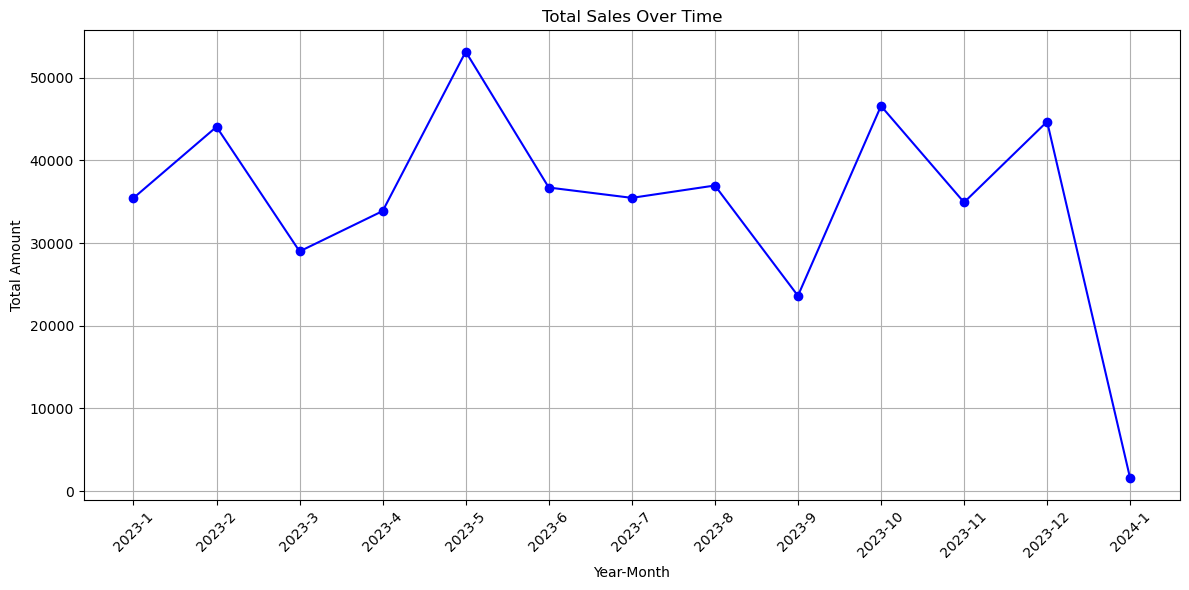

In [10]:
# compile total sales by Year and Month
df_aggregated = df.groupby(['Year', 'Month'])['Total Amount'].sum().reset_index()

# combine Year and Month for plotting
df_aggregated['Year_Month'] = df_aggregated['Year'].astype(str) + '-' + df_aggregated['Month'].astype(str)

# create  plot
plt.figure(figsize=(12, 6))
plt.plot(df_aggregated['Year_Month'], df_aggregated['Total Amount'], marker='o', linestyle='-', color='b')
plt.title('Total Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph shows the total sales over time, with months along the x-axis (from January 2023 to January 2024) and total sales amounts on the y-axis. We can see that the total sales fluctuated throughout the years. It started around 35,000 in January 2023, rose in February, then dipped in March, before reaching a peak in **May**, with the **highest point of sales** which was approximately 56,000. It decreased the next month and somehow showed relative stability until August around 35,000 before dropping significantly in September to roughly 23,000. October had the second-highest total sales in the whole year, around 47,000, although it didn't last long. It declined again in November which slightly recovered in December, but then it steeply dropped to the **lowest sales point** (around 0) at the **end of the year**.

The spikes could relate with seasonal demand (holidays, etc.) or promotions, while the dips might suggest low-demand periods or external factors affecting sales, such as market changes or product availability which needs to be studied further. Retails should take into account the strategies to mitigate this sales instability through marketing, engagement / loyalty programs, inventory planning (to ensure adequate stock levels while avoiding overstock during slower months), appropriate budgeting and forecasting, and many more. Retailers could also learn from the successes of high sales and focus on implementing and finding a workaround for the slower months while capitalising on the peak periods to maximise sales.

### 2. Sales by Product Category
This visualisation aims to address questions such as:  
* Which product categories perform the best and which category generates the least sales?  
* What are the strategies applicable to generate more sales? 

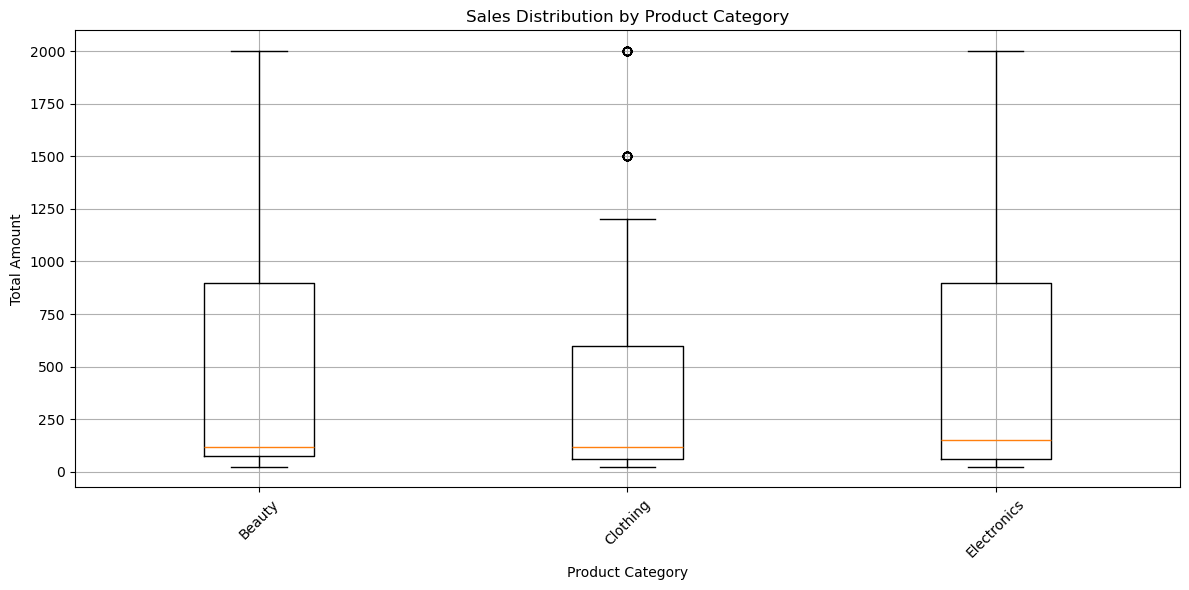

In [11]:
# group the data by 'Product Category' and extract 'Total Amount'.
grouped_data = [group['Total Amount'].values for _, group in df.groupby('Product Category')]

# find the unique product categories to use as labels
categories = df['Product Category'].unique()

# create the box plot
plt.figure(figsize=(12, 6))
plt.boxplot(grouped_data, labels=categories)

# add title and labels
plt.title('Sales Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')

# rotate x-axis labels for better readability
plt.xticks(rotation=45)

# add a grid
plt.grid(True)

# adjust layout and display the plot
plt.tight_layout()
plt.show()


This boxplot shows the distribution of total sales amounts across three product categories: Beauty, Clothing, and Electronics. Generally, we can see that every category has a low median which may indicate frequent low-value sales. The Beauty and Electronics category have a similar upper whisker length which displays that there are higher sales amounts extending to 2000. This broader range of sales suggests more variability compared to the Clothing category. In the Clothing department, the presence of outliers are detected, this displays that there might be occasional high-value sales that deviate from the typical sales pattern.  

With its wide range, the Beauty category could promote high-end beauty products to achieve maximum sales amount or focus on product bundlings, for example, or other strategies when most transactions are lower value. Similarly, the Electronics category’s broad range of sales value indicates a diverse product line with varying price points (e.g., from accessories to more expensive gadgets). Retailers could use this information to segment their customers and target them with more personalized marketing strategies. Meanwhile, the Clothing category could focus on high-value outliers since there are occasional transactions that are significantly higher. Grasping on what are the drivers of this trend can help retailers to encourage more high-value purchases through initiatives such as personalised marketings or special offers. Retailers can also focus on emphasising bulk transactions as the median sales values are relatively low. This means that while the store might be generating frequent sales, the average transaction size remains small. Let's take a deeper look at how the product categories perform across genders.

### 3. Sales by Gender and Product Category
This visualisation aims to address questions such as:  
* How do gender differences influence total sales across various product categories?
* What are the strategies needed to uniformise this difference (if any) and improve sales? 


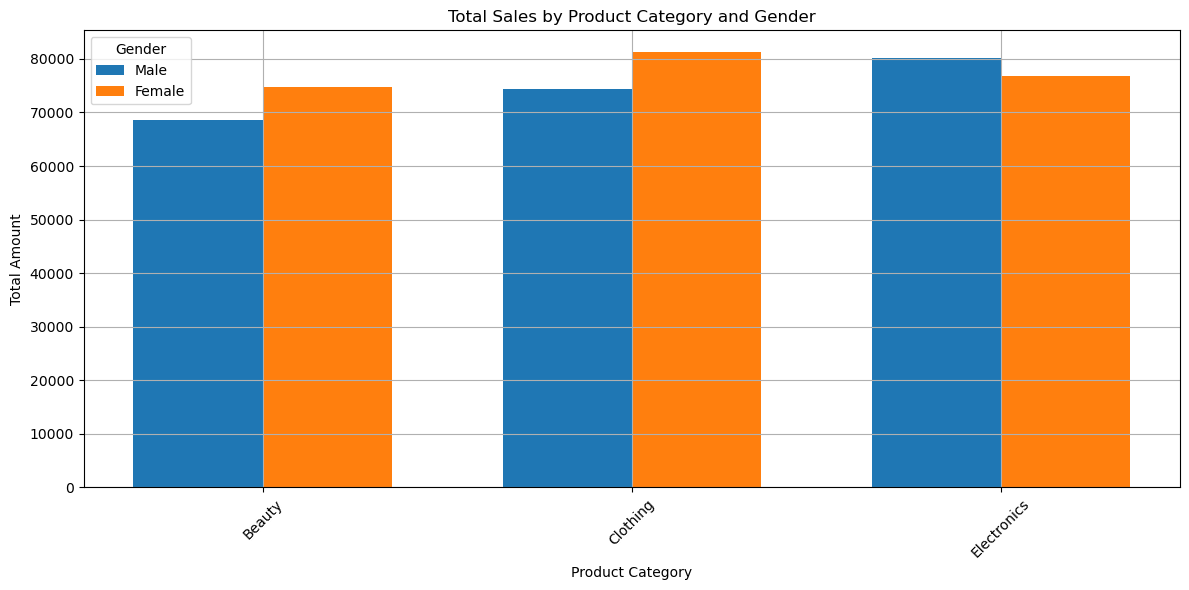

In [12]:
# grouping data by Gender and Product Category while summing Total Amount
grouped_data = df.groupby(['Gender', 'Product Category'], as_index=False)['Total Amount'].sum()

# compile data for plotting
categories = grouped_data['Product Category'].unique()  # Unique product categories
genders = grouped_data['Gender'].unique()  # Unique genders
bar_width = 0.35  # Width of the bars
x = np.arange(len(categories))  # X locations for the bars

# separate data for each gender
male_data = grouped_data[grouped_data['Gender'] == 'Male']['Total Amount']
female_data = grouped_data[grouped_data['Gender'] == 'Female']['Total Amount']

# initialise the figure and axis
plt.figure(figsize=(12, 6))

# plot bars for each gender explicitly
plt.bar(x, male_data, width=bar_width, label='Male')
plt.bar(x + bar_width, female_data, width=bar_width, label='Female')

# add title and labels
plt.title('Total Sales by Product Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')

# adjust the x-ticks to be in the middle of the grouped bars
plt.xticks(x + bar_width / 2, categories, rotation=45)

# add legend and grid
plt.legend(title='Gender')
plt.grid(True)

# adjust layout and display the plot
plt.tight_layout()
plt.show()

Overall, this bar chart displays that sales are relatively balanced between genders across all categories, suggesting no dominant gender skew in purchasing behavior. Female customers appear to be a slightly higher consumer in the beauty and clothing category. But since the difference between genders are small, it suggests that these markets appeal to a wider audience. Retailers could further explore to expand product lines or do more target marketings toward the male customers (e.g. male skincare products or apparels). Seasonal promotions and discounts might also be considered to boost sales, especially in the male group. 

Meanwhile, the male groups outspend the female customers in the Electronics category, although not showing a huge difference. This could indicate a well-balanced product range that appeals to both genders. Retailers can capitalise on this by retaining diverse product offerings that cater to different interests, such as gadgets, smart home tech, or gaming accessories. Generally, retailers should continue to promote inclusivity across these categories while focusing on market segmentations and personalised recommendations to help boost sales further.

### 4. Sales by Age Group
This visualisation aims to address questions such as:  
* How do total sales behaviors vary across different age groups? 
* What factors influence the purchasing patterns and transaction sizes among these demographics?"

<Figure size 1200x600 with 0 Axes>

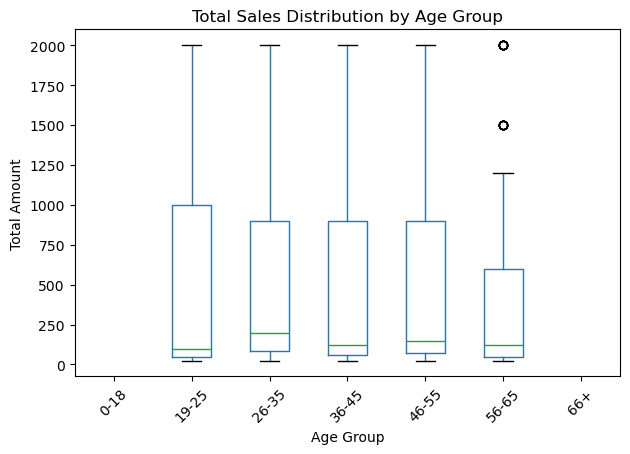

In [13]:
# create a new column 'Age Group' using pd.cut
bins = [0, 18, 25, 35, 45, 55, 65, 100]  
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']  

df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# create the boxplot
plt.figure(figsize=(12, 6))
df.boxplot(column='Total Amount', by='Age Group', grid=False)

# add labels and details to display the plot
plt.title('Total Sales Distribution by Age Group')
plt.suptitle('') 
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

From this boxplot, we can see that the 19-25, 26-35, 36-45, and 46-55 age groups show similar sales distribution patterns with a wide range of sales amounts extending up to 2000. The consistent spread suggests that purchasing behaviors in these age groups might be diverse, with both lower and higher-priced items being bought. Meanwhile the medians are relatively low, which can indicate that while there are occasional high-value transactions, the bulk of sales are on the lower side. Meanwhile, the 56-65 age group displays a narrower sales range with the maximum around 1500. This group has a lower median, and two outliers, which indicate unusual high-value purchases. This indicates that while this age group may not be a frequent or high spender on average, there are some specific cases of larger transactions. The 66+ age group is not shown in the distribution, suggesting either minimal or no data. It could imply that elders are less engaged in purchasing from these retail categories.   

Therefore, to increase sales in the younger and middle-aged groups (19-55), retailers should explore tailoring marketing efforts and seasonal promotions to attract these groups based on their varied interests. For example, promoting a mix of budget-friendly products alongside premium items can help capture different segments within these age groups. Moreover, retailers could focus on high-quality, practical products that cater to the 56-65 age group's niche needs. Also, retailers could explore the potential market gap existing in the 66+ age group to add a new market segment and eventually generate more sales. 


Since this analysis is done, let's drop the Age Group column as it is not needed for further analysis.

In [14]:
# drop the Age Group column
df = df.drop(columns=['Age Group'])

# check to confirm the column has been dropped
print(df.head())

   Transaction ID Customer ID  Gender  Age Product Category  Quantity  \
0               1     CUST001    Male   34           Beauty         3   
1               2     CUST002  Female   26         Clothing         2   
2               3     CUST003    Male   50      Electronics         1   
3               4     CUST004    Male   37         Clothing         1   
4               5     CUST005    Male   30           Beauty         2   

   Price per Unit  Total Amount  Year  Month  Day  Day_of_Week  Quarter  
0              50           150  2023     11   24            4        4  
1             500          1000  2023      2   27            0        1  
2              30            30  2023      1   13            4        1  
3             500           500  2023      5   21            6        2  
4              50           100  2023      5    6            5        2  


### 5. Sales by Quantity
This visualisation aims to address questions such as:  
* What factors influence the relationship between the quantity of items purchased and the total sales amount?
* How can retailers effectively increase the number of items per transaction?

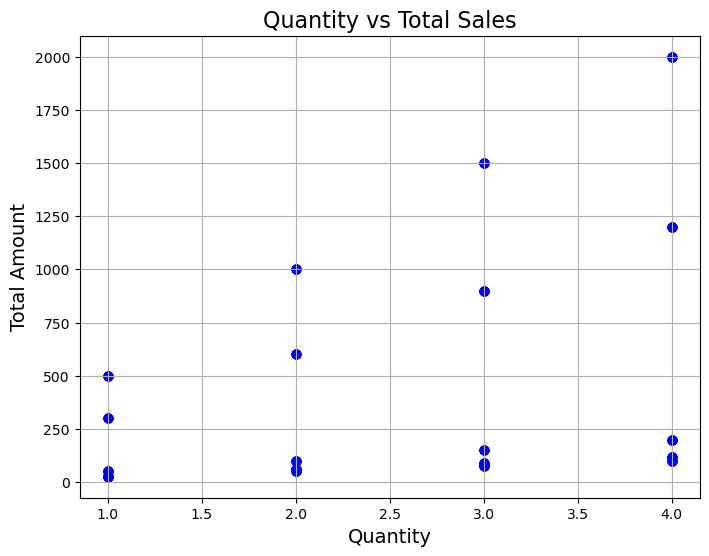

In [15]:
# Scatter plot using Matplotlib
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(df['Quantity'], df['Total Amount'], alpha=0.6, color='b')  # alpha controls transparency
plt.title('Quantity vs Total Sales', fontsize=16)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Total Amount', fontsize=14)
plt.grid(True)
plt.show()

This scatter plot shows that there is a general positive relationship between quantity and total amount, meaning that as more items are purchased, the total sales amount tends to increase. This is expected as buying more items naturally leads to a higher total. In the low quantities (1-2 items) the plot shows a wide spread of total amounts when customers buy only 1 or 2 items. This suggests that even with low quantities, there is variability in the total amount. It could mean that individual items range widely in price, from low-cost products to more expensive ones. Meanwhile, for items with higher quantities (3-4 items) there are fewer data points and there is an outlier at 4 items, where the total amount exceeds 2000. This suggests that while most customers buying multiple items tend to spend moderately, there are occasional high-value transactions; customers buy several expensive items at once.  

To encourage customers to buy more items, businesses could introduce promotions or discounts for bulk purchases. For example, "buy 3, get 1 free" or discounts could encourage customers to increase the number of items they purchase. The outliers indicate that there are customers willing to spend high amounts, even when purchasing multiple items. Retailers could look into creating premium product bundles to cater to this demographic or offer exclusive deals that encourage repeat purchases of high-end items. To gain a wider customer base, retailers should highlight both affordable and premium items. Now let's include Price per Unit as another factor to explain the differences in total sales for the same quantities sold.


### 6. Sales by Quantity and Price Per Unit
* How do price per unit and quantity influence the total sales amount?  
* What strategies can retaukers adopt to maximise revenue from different product pricings?

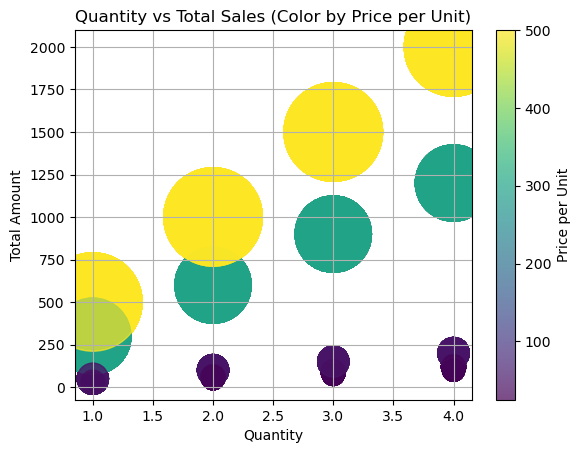

In [16]:


# Assuming 'Quantity', 'Total_Amount', and 'Price_per_Unit' are columns in your DataFrame
plt.scatter(df['Quantity'], df['Total Amount'], 
            c=df['Price per Unit'], 
            s=df['Price per Unit'] * 10,  # Adjust size scaling factor
            cmap='viridis', alpha=0.7)

plt.colorbar(label='Price per Unit')
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.title('Quantity vs Total Sales (Color by Price per Unit)')
plt.grid(True)
plt.show()


This bubble plot shows the relationship between quantity, total sales amount, and price per unit. The size of the bubbles indicates the quantity of items purchased, while the color gradient represents the price per unit (with darker colors for lower prices and lighter colors for higher prices). We can see that larger bubbles (higher quantities) appear at various total amounts, showing that higher quantities do not always correspond to higher total sales, which is likely influenced by the price per unit. Meanwhile, the color gradient indicates that higher total amounts often correspond to lighter-colored bubbles, suggesting a higher price per unit. This means that when customers are purchasing more expensive items, even buying fewer of them can lead to a high total amount. Simultaneously, cheaper products contribute less to the overall sales figure, even when bought in higher quantities. For higher quantities (3-4 items), the range of total sales seems narrower, indicating that when customers purchase more items, they are likely selecting from the lower or mid-range priced products.  

In this case, retailers could leverage this by offering premium versions of products that appeal to customers willing to spend more on fewer items. Bundling strategies (like bulk purchase discounts) can also be considered to encourage customers to buy more while maintaining or slightly increasing the average price per unit, which can lead to higher overall sales volumes. Moreover, segmented marketing strategies and personalised product recommendations also need to be explored to target these different customer groups, especially for higher-priced items, to further encourage them to make premium purchases, even in smaller quantities.

### Overall Analysis:

Based on the analyses of sales trends, product categories, demographics, and purchasing patterns,we can see that sales dynamics are influenced by a combination of seasonal demands, product pricing, and customer demographics. The sales trend over the year displays major fluctuations, suggesting the impact of seasonal promotions and external factors. Retailers should capitalise on peak periods while addressing drops through targeted marketing and inventory strategies to ensure consistent sales throughout the year.  

The analysis across product categories, genders, and age groups highlights a generally balanced interest, with slight diversities indicating opportunities for tailored marketing. The correlation between quantity, total sales, and price per unit reveals that both high-value, low-quantity purchases and bulk buying of affordable products contribute to overall revenue. To optimise sales, businesses should consider bundling strategies, personalised promotions, and product diversification to cater to varied customer preferences, thereby enhancing engagement and boosting transaction sizes.
  
Future studies could investigate the specific factors driving sales fluctuations throughout the year, such as the impact of seasonal events, marketing campaigns, and market conditions. Additionally, deeper analysis into the purchasing behaviors of different demographics (e.g., by gender and age group) could reveal preferences that inform more targeted product offerings and marketing strategies. Examining how price sensitivity affects buying decisions across product categories may also help refine pricing strategies to maximise revenue.

## Outliers Handling

In [17]:
# calculate Q1 and Q3
Q1 = df['Total Amount'].quantile(0.25)
Q3 = df['Total Amount'].quantile(0.75)
IQR = Q3 - Q1

# define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# identify outliers
outliers = df[(df['Total Amount'] < lower_bound) | (df['Total Amount'] > upper_bound)]
print("Outliers detected:\n", outliers)


Outliers detected:
 Empty DataFrame
Columns: [Transaction ID, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount, Year, Month, Day, Day_of_Week, Quarter]
Index: []


There are no extreme values that could be classified as outliers.

This implies that the data is relatively consistent, and there are no transactions that are significantly higher or lower than the majority of the data points. Although it’s essential to be cautious of the data integrity.

## Categorical Data Handling

In [18]:
# check & filter categorical columns
print(df.dtypes[df.dtypes == 'object'])

Customer ID         object
Gender              object
Product Category    object
dtype: object


There are three categorical data in this dataset which are Customer ID, Gender and Product Category

Now let's for the unique values for each categorical columns.

In [19]:
# compile the categorical columns
categorical = ['Customer ID', 'Gender', 'Product Category']

# check the number of unique values
unique_counts = df[categorical].nunique()

# compare unique counts to the length of the data for deletion
unique_check = unique_counts == len(df)
print(unique_check)

Customer ID          True
Gender              False
Product Category    False
dtype: bool


Customer ID is a unique identifier for each customer and should not be treated as a feature for analysis.   
Drop this column as it doesn’t provide meaningful information for predictions.

In [20]:
# drop Customer ID 
df.drop(columns=['Customer ID'], inplace=True)

# convert remaining categorical columns into numerical 
categorical_column = ['Gender', 'Product Category']
df_new = pd.get_dummies(df, columns=categorical_column, drop_first=True, dtype=int)
df_new.head()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount,Year,Month,Day,Day_of_Week,Quarter,Gender_Male,Product Category_Clothing,Product Category_Electronics
0,1,34,3,50,150,2023,11,24,4,4,1,0,0
1,2,26,2,500,1000,2023,2,27,0,1,0,1,0
2,3,50,1,30,30,2023,1,13,4,1,1,0,1
3,4,37,1,500,500,2023,5,21,6,2,1,1,0
4,5,30,2,50,100,2023,5,6,5,2,1,0,0


After encoding the data, it seems like the Product Category Beauty is missing.

The disappearance of the "Beauty" category when encoding the data most likely happens due to the use of the drop_first=True parameter in the pd.get_dummies() function. This parameter drops the first category in each categorical column to avoid multicollinearity when using the data for regression models, where including all categories can lead to redundancy. The encoded variables Clothing and Electronics will indicate the effect relative to Beauty.  
So we'll proceed.

## Create a Linear Regression Model without feature selection

* The attribute "Total Amount" is the label, which is the prediction target. The remaining attributes are the features.
* The ratio for splitting the dataset is 80% for training and 20% for testing. 

### Set target

In [21]:
# set target features and label
X = df_new.drop('Total Amount', axis=1) 
y = df_new['Total Amount']

### Split train & test set

In [22]:
# split the dataset into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print shape
print("Train features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Train label shape:", y_train.shape)
print("Test label shape:", y_test.shape)

Train features shape: (800, 12)
Test features shape: (200, 12)
Train label shape: (800,)
Test label shape: (200,)


### Build the linear regression model

In [23]:
# initialize and train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
# create predictions on both train and test data
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# calculate metrics for train data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)


# calculate metrics for test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# print the metrics for both train and test sets
print(f"Linear Regression without Selected Features")
print(f"Training MAE: {train_mae:.4f}, Training MSE: {train_mse:.4f} Training R²: {train_r2:.4f}")
print(f"Testing MAE: {test_mae:.4f}, Testing MSE: {test_mse:.4f}, Testing R²: {test_r2:.4f}")

Linear Regression without Selected Features
Training MAE: 174.6201, Training MSE: 45894.8824 Training R²: 0.8559
Testing MAE: 175.4554, Testing MSE: 43201.0139, Testing R²: 0.8524


Overall, the linear regression done on all features show high R² values (above 0.85) for both training and testing data which suggests that the model has a good fit, capturing most of the variance in the data. This indicates that the linear regression model is effective in explaining the relationships of the dataset. Moreover, the similarity between training and testing metrics (MAE, MSE, and R²) indicates that the model generalizes well to new data without significant overfitting.

The performance on the test set is close to that on the training set, suggesting the model is robust. However, while the model performs well, the relatively high MAE (around 175 units) and MSE (in the tens of thousands) suggest there is room for improvement. Exploring feature selection, addressing potential outliers, or considering interactions and non-linear effects might improve the model’s predictive accuracy further.

Now let's take a look on how the model would be if feature selection is implemented.

## Perform the recursive feature elimination (RFE) technique 

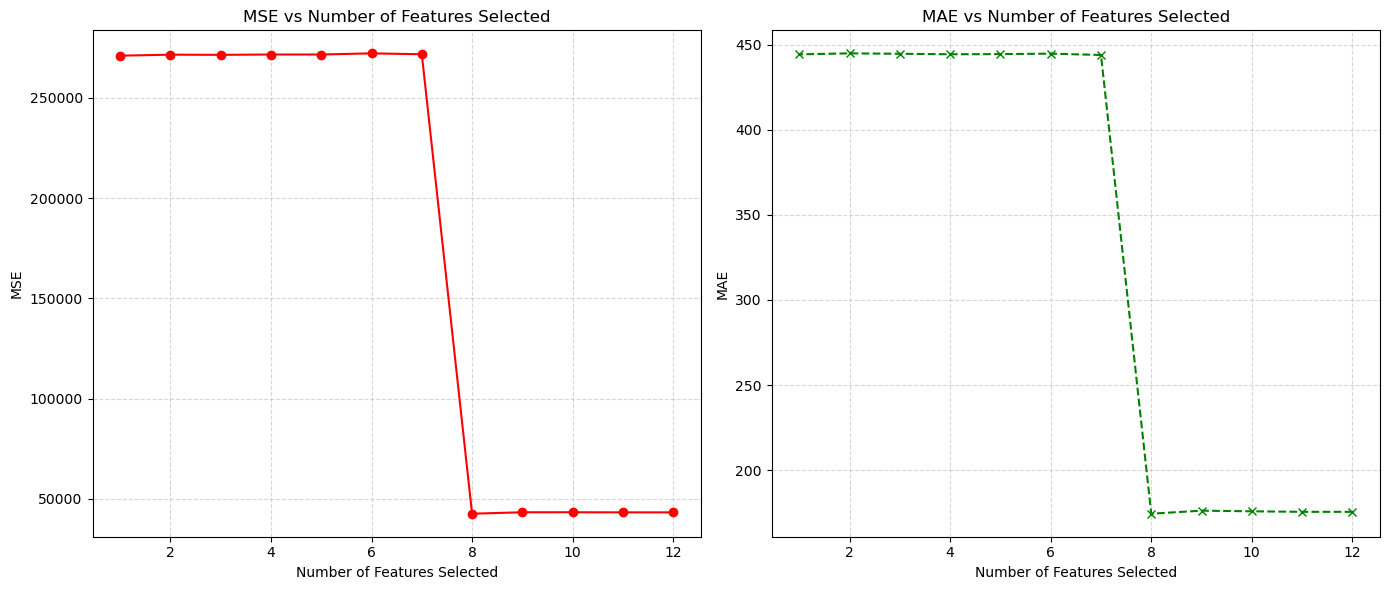

In [25]:
# create empty lists to store performance metrics
mse_scores = []
mae_scores = []
r2_scores = []

# get the total number of features
num_features = X_train.shape[1]

# create a loop to eliminate features and find the best features
for i in range(num_features, 0, -1):
    # create RFE model 
    rfe = RFE(LinearRegression(), n_features_to_select=i)
    
    # fit RFE on the train set
    rfe.fit(X_train, y_train)
    
    # make predictions on the test set
    y_test_pred = rfe.predict(X_test)
    
    # calculate the metrics
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    
    # append the results to the empty lists created
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)

# visualisation: side-by-side subplots for MSE and MAE
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# plot MSE on the first subplot
axs[0].plot(range(num_features, 0, -1), mse_scores, label='MSE', color='red', marker='o', linestyle='-')
axs[0].set_title('MSE vs Number of Features Selected')
axs[0].set_xlabel('Number of Features Selected')
axs[0].set_ylabel('MSE')
axs[0].grid(True, linestyle='--', alpha=0.5)

# plot MAE on the second subplot
axs[1].plot(range(num_features, 0, -1), mae_scores, label='MAE', color='green', marker='x', linestyle='--')
axs[1].set_title('MAE vs Number of Features Selected')
axs[1].set_xlabel('Number of Features Selected')
axs[1].set_ylabel('MAE')
axs[1].grid(True, linestyle='--', alpha=0.5)

# adjust the layout
plt.tight_layout()
plt.show()


In this visualisation, the MSE and MAE are displayed separately as they have different value ranges. The R² score is not included in the feature selection process because they provide a more direct measurement of how well your model predicts the target variable. Focusing solely on MSE and MAE will help prevent overfitting by reflecting the true errors, giving a clearer, more reliable insights into model performance.

From the plots, we can see that there is a sharp improvement at **8 features** and the stabilization thereafter foe both MSE and MAE scores. Hence, the recommended feature count for the linear regression model is 8. Although most of the times including minimum features lead to a more optimised model, including fewer than 8 features will likely result in the model missing critical information, eventually leading to higher errors. Conversely, adding more than 8 features does not lead to significant performance gains, as seen by the flat line after 8 features. So, the optimal choice would be to include **8 features** in the model to capture the necessary information for accurate predictions.

In [26]:
# define number of the previously selected features
features = 8

# perform RFE with the selected number of features
rfe = RFE(lr, n_features_to_select=features)

# fit RFE on the train set
rfe.fit(X_train, y_train)

# get the mask of retained features (True for kept features)
selected_mask = rfe.support_

# find the names of the retained features
selected_features = X_train.columns[selected_mask]
print("Selected Features:", selected_features)

Selected Features: Index(['Quantity', 'Price per Unit', 'Month', 'Day_of_Week', 'Quarter',
       'Gender_Male', 'Product Category_Clothing',
       'Product Category_Electronics'],
      dtype='object')


So after applying RFE, the 8 selected features are: **Quantity, Price per Unit, Month, Day_of_Week, Quarter, Gender Male, Product Category Clothing, and Product Category_Electronics**, which indicates that these factors have a more profound impact than the rest in determining the total sales prediction.

## Perform Linear Regression with the selected features

In [27]:
# define X and y based on selected features
X_train_selected = X_train[['Quantity', 'Price per Unit', 'Month', 'Day_of_Week', 'Quarter',
       'Gender_Male', 'Product Category_Clothing','Product Category_Electronics']]
X_test_selected = X_test[['Quantity', 'Price per Unit', 'Month', 'Day_of_Week', 'Quarter',
       'Gender_Male', 'Product Category_Clothing','Product Category_Electronics']]

# create and train the linear regression model
lr = LinearRegression()
lr.fit(X_train_selected, y_train)

LinearRegression()

In [28]:
# make predictions
y_train_pred_s = lr.predict(X_train_selected)
y_test_pred_s = lr.predict(X_test_selected)

# evaluate the model
train_mae_s = mean_absolute_error(y_train, y_train_pred_s)
train_mse_s = mean_squared_error(y_train, y_train_pred_s)
train_r2_s = r2_score(y_train, y_train_pred_s)

test_mae_s = mean_absolute_error(y_test, y_test_pred_s)
test_mse_s = mean_squared_error(y_test, y_test_pred_s)
test_r2_s = r2_score(y_test, y_test_pred_s)

# Print evaluation metrics
print(f"Linear Regression with Selected Features")
print(f"Training MAE: {train_mae_s:.4f}, Training MSE: {train_mse_s:.4f}, Training R²: {train_r2_s:.4f}")
print(f"Testing MAE: {test_mae_s:.4f}, Testing MSE: {test_mse_s:.4f}, Testing R²: {test_r2_s:.4f}")

Linear Regression with Selected Features
Training MAE: 175.9797, Training MSE: 46266.9875, Training R²: 0.8547
Testing MAE: 174.3490, Testing MSE: 42533.4961, Testing R²: 0.8547


### The comparison of Linear Regression results with and without Feature Selection:

|      Performance     |            Model            |    MAE    |     MSE     |   R²   |
|----------------------|-----------------------------|-----------|-------------|--------|
| **Training**         | Without Selected Features   | 174.6201  | 45,894.8824 | 0.8559 |
|                      | With Selected Features      | 175.9797  | 46,266.9875 | 0.8547 |
| **Testing**          | Without Selected Features   | 175.4554  | 43,201.0139 | 0.8524 |
|                      | With Selected Features      | 174.3490  | 42,533.4961 | 0.8547 |


The model with selected features has a slightly higher MAE and MSE on the training set compared to the model without feature selection. The R² is also marginally lower (0.8547 vs. 0.8559), indicating that it explains slightly less variance in the data. However, the differences are quite small. The model without feature selection performs slightly better on the training data, with lower errors and a higher R². Testing Performance:

On the testing set, the model’s performance without feature selection shows slightly higher errors (MAE and MSE) and a slightly lower R² compared to the selected features model. This suggests that the model without feature selection might be overfitting slightly, capturing noise in the training data that doesn’t generalize as well to new data.

To proceed with the Polynomial Regression, the model with 8 selected features shows slightly better generalization, Although the difference is minimal, this approach allows to build a simpler and more efficient polynomial model that is less likely to overfit while still capturing the key patterns needed for accurate predictions. So the selected features will be used for the Polynomial Regression.


## Create a Polynomial Regression Model

In [29]:
# create polynomial features of degree 2
poly = PolynomialFeatures(degree=2) 

# fit and transform the training and testing data with selected features
X_train_poly = poly.fit_transform(X_train_selected)
X_test_poly = poly.transform(X_test_selected)

# initialise a linear regression model
poly_model = LinearRegression()

# fit the polynomial regression model on the transformed training data
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [30]:
# create predictions from the polynomial regression model
y_train_poly_pred = poly_model.predict(X_train_poly)
y_test_poly_pred = poly_model.predict(X_test_poly)

# Polynomial Regression Evaluation
poly_train_mae = mean_absolute_error(y_train, y_train_poly_pred)
poly_train_mse = mean_squared_error(y_train, y_train_poly_pred)
poly_train_r2 = r2_score(y_train, y_train_poly_pred)
poly_test_mae = mean_absolute_error(y_test, y_test_poly_pred)
poly_test_mse = mean_squared_error(y_test, y_test_poly_pred)
poly_test_r2 = r2_score(y_test, y_test_poly_pred)

# print results
print("Polynomial Regression - Training MAE:", poly_train_mae, "Training MSE:", poly_train_mse, "R²:", poly_train_r2)
print("Polynomial Regression - Testing MAE:", poly_test_mae, "Testing MSE:", poly_test_mse, "R²:", poly_test_r2)

Polynomial Regression - Training MAE: 9.026734915096313e-13 Training MSE: 1.0849371268016482e-24 R²: 1.0
Polynomial Regression - Testing MAE: 8.79065709114002e-13 Testing MSE: 1.0461862596532747e-24 R²: 1.0


Both the training and testing performance metrics suggest a near-perfect model, with incredibly low MAE and MSE values and an R² of 1.0. This implies that the polynomial regression model has learned to predict the target variable almost exactly, even on unseen data.

While a perfect R² and very low error rates might seem ideal, they could be a sign of overfitting. In polynomial regression, overfitting can happen when the model captures not only the underlying patterns but also the noise in the training data, leading to a perfect fit that may not generalize well to truly unseen data.

Since the dataset is synthetic and small, the perfect fit might indicate that the data follows a specific, predefined pattern that the polynomial regression has managed to capture accurately. A cross-validation with and `Ridge Regularisation` will be done to help mitigate the overfitting. 

### Visualise the True vs. Predicted Values for Linear Regression and Polynomial Regression

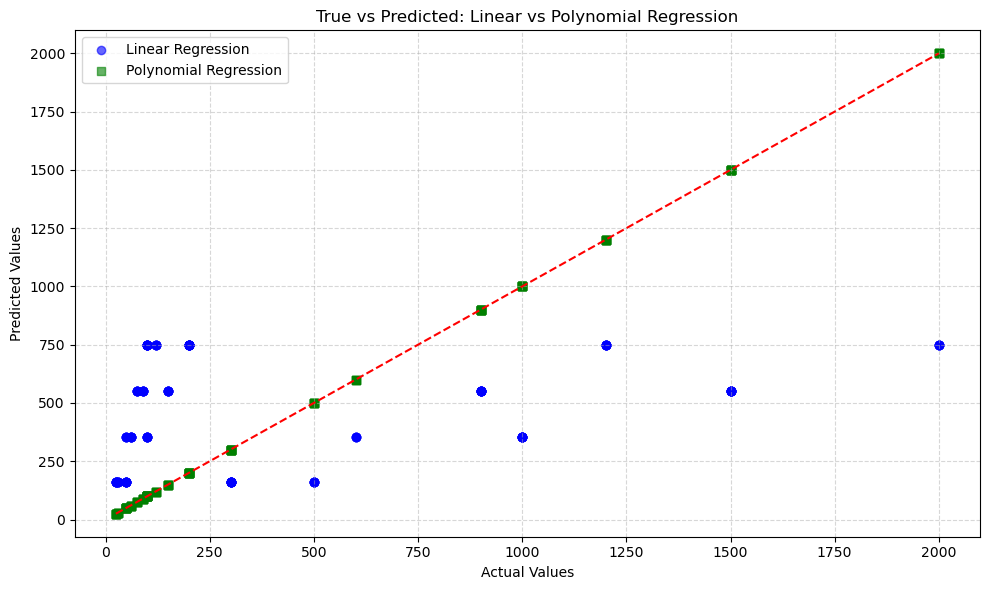

In [31]:
# plot predicted vs actual values for both models
plt.figure(figsize=(10, 6))

# plot true vs predicted for Linear Regression
plt.scatter(y_test, y_test_pred, label='Linear Regression', color='b', alpha=0.6, marker='o')

# plot true vs predicted for Polynomial Regression
plt.scatter(y_test, y_test_poly_pred, label='Polynomial Regression', color='g', alpha=0.6, marker='s')

# add a 45-degree reference line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')

# add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted: Linear vs Polynomial Regression')
plt.legend()

# display the plot
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The graph compares the true vs. predicted values for both Linear Regression (blue dots) and Polynomial Regression (green dots), with a red dashed line representing the ideal scenario where predictions perfectly match actual values. The Linear Regression model shows significant inconsistencies, especially at higher values, indicating that it struggles to capture the true underlying patterns. This can be seent from the wide spread of blue dots, which suggests underfitting, as the model fails to account for non-linear relationships in the data.

Contrastingly, the Polynomial Regression model demonstrates near-perfect alignment with the red dashed line, indicating highly accurate predictions across the entire range of actual values. The green dots closely follow the ideal line, showing that the model effectively captures complex patterns and interactions within the data. This suggests a much better fit compared to Linear Regression, particularly for higher values where the linear model tends to fail.

While Polynomial Regression outperforms Linear Regression, the near-perfect fit raises concerns about overfitting, especially since the dataset is synthetic. Overfitting could mean the model is capturing noise rather than general patterns, which may not translate well to new, unseen data. Therefore, while Polynomial Regression displays a stronger performance here, further validation on different datasets would be essential to confirm its generalisability.

## Apply cross-validation

In [32]:
# define X
X_poly = poly.fit_transform(X)

# apply cross-validation for MAE
mae_scores = cross_val_score(poly_model, X_poly, y, cv=5, scoring='neg_mean_absolute_error')
mae_scores = -mae_scores  # Convert to positive values
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)

# apply cross-validation for MSE
mse_scores = cross_val_score(poly_model, X_poly, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -mse_scores  # Convert to positive values
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

# print the results
print(f'Mean MAE: {mean_mae:.2f}, Standard Deviation of MAE: {std_mae:.2f}')
print(f'Mean MSE: {mean_mse:.2f}, Standard Deviation of MSE: {std_mse:.2f}')

Mean MAE: 0.00, Standard Deviation of MAE: 0.00
Mean MSE: 0.00, Standard Deviation of MSE: 0.00


The fact that both the Mean Absolute Error (MAE) and Mean Squared Error (MSE) are 0.00 indicates that the model’s predictions match the actual values exactly. This level of accuracy across all cross-validation folds is highly unusual and typically implies that the model can predict the target variable without any error, which is rare in real-world scenarios.

Such perfect results indicates a sign of overfitting, especially if your dataset is synthetic. 
Now let's use cross-validation with `GridSearchCV` to perform a `RidgeRegularisation`

In [33]:
# define alpha values to test
alpha_values = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# perform grid search with cross-validation for Ridge
ridge_cv_model = GridSearchCV(Ridge(), alpha_values, cv=5)
ridge_cv_model.fit(X_train_poly, y_train)

# Best alpha
best_alpha = ridge_cv_model.best_params_['alpha']
print("Best alpha for Ridge:", best_alpha)

Best alpha for Ridge: 0.1


By applying an alpha of 0.1, the Ridge model will slightly penalise larger coefficients, leading to a more generalised model that should perform better on unseen data.

In [34]:
# apply Ridge Regression
ridge_model = Ridge(alpha=0.1)  # alpha is the regularization strength; higher values = more regularization
ridge_model.fit(X_train_poly, y_train)

# make predictions
y_train_pred_ridge = ridge_model.predict(X_train_poly)
y_test_pred_ridge = ridge_model.predict(X_test_poly)

# evaluate Ridge Regression performance
ridge_train_mae = mean_absolute_error(y_train, y_train_pred_ridge)
ridge_train_mse = mean_squared_error(y_train, y_train_pred_ridge)
ridge_test_mae = mean_absolute_error(y_test, y_test_pred_ridge)
ridge_test_mse = mean_squared_error(y_test, y_test_pred_ridge)
ridge_train_r2 = r2_score(y_train, y_train_pred_ridge)
ridge_test_r2 = r2_score(y_test, y_test_pred_ridge)

print("Ridge Regression - Training MAE:", ridge_train_mae, "Training MSE:", ridge_train_mse, "R²:", ridge_train_r2)
print("Ridge Regression - Testing MAE:", ridge_test_mae, "Testing MSE:", ridge_test_mse, "R²:", ridge_test_r2)

Ridge Regression - Training MAE: 4.801837952461696e-07 Training MSE: 3.5393702507921466e-13 R²: 1.0
Ridge Regression - Testing MAE: 5.069587751727056e-07 Testing MSE: 3.856534615457696e-13 R²: 1.0


The results of the Ridge Regression model show extremely low error metrics and a perfect R² score of 1.0 on both the training and testing datasets:

These values suggest that the Ridge Regression model provides almost perfect predictions with negligible error. The very low MAE and MSE indicate that the model's predictions closely match the actual values, and the R² of 1.0 implies that the model explains all the variance in the data. However, such perfect results could indicate potential overfitting, especially if the data is synthetic or follows a clear, deterministic pattern. Ridge regularisation usually helps mitigate overfitting, but in this case, the data itself might be too clean or simple, leading to these perfect scores.

## Conclusion:

The regression analysis began with a **linear regression model**, which achieved a reasonably high **R²** of around 0.85, indicating it could explain a substantial portion of the variance in sales. However, the model struggled with higher value predictions, showing deviations that suggested it couldn’t capture non-linear patterns. To address this, **polynomial regression** was introduced, leading to near-perfect predictions with an R² of 1.0 and near-zero **MAE** and **MSE**. Although this indicated an excellent fit, it raised concerns about overfitting, especially given the synthetic nature of the dataset. **Cross-validation** confirmed the model’s accuracy but also highlighted the risk of the model being overly tailored to the data.

To improve generalisability, **Ridge regularisation** was applied. Surprisingly, the Ridge model retained a perfect R² score of 1.0, with very low MAE and MSE on both training and testing datasets, suggesting it effectively learned the data patterns. However, these perfect results even with regularisation imply potential **overfitting**, as the model may have adapted too closely to the specific patterns of the dataset.

In conclusion, the assignment demonstrated how different regression techniques could be used to predict total sales, progressing from a simple linear model to more complex polynomial regression and regularisation methods. While the models provided excellent predictive power on the given data, the results emphasize the need for caution against overfitting, especially when working with synthetic datasets. Future research should consider testing these models on more diverse and real-world data to assess their generalisability and adapt the models accordingly. The insights from the initial bivariate and multivariate analyses also offer valuable guidance such as targeted marketing strategies and product bundling to maximise sales based on the observed patterns and relationships.